In [28]:
import os
import re
import cv2
import shutil
import random

video_dir_path = '/Users/mikky/lipread_mp4'

Analyze:



decide how many frames each video



2. extract frames according to the decided sample rate and save them in a image folder 
3. extract lip points from these frames and save them in three npy files: train, valid, test
[
(label, video_name, [[40 lip points], [40 lip points], ...]),
(label, vidoe_name, [[40 lip points], [40 lip points], ...]),
]
4. modelling, read from this file

### Frame rate

In [11]:
sample_1 = 'data/sample_video/MONTH_01000.mp4'
sample_2 = 'data/sample_video/YESTERDAY_01000.mp4'

def get_frame_rate(video_path):
    # Load your video
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
    else:
        # Get the frames per second (fps) of the video
        fps = cap.get(cv2.CAP_PROP_FPS)
        print("Frame Rate : ", fps)
    
        # When everything done, release the capture
        cap.release()


# frame rate

In [12]:
get_frame_rate(sample_1)
get_frame_rate(sample_2)

Frame Rate :  25.0
Frame Rate :  25.0


In [22]:
def sample_and_copy_mp4_files(source_directory, target_directory, num_samples=200):
    # Ensure the target directory exists, if not, create it
    os.makedirs(target_directory, exist_ok=True)

    # Get all files that end with '.mp4'
    files = [file for file in os.listdir(source_directory) if file.endswith('.mp4')]

    # Check if there are enough files to sample
    if len(files) < num_samples:
        print("Not enough files to sample. Available files: ", len(files))
        return []  # Return an empty list or handle the scenario appropriately

    # Randomly sample files
    sampled_files = random.sample(files, num_samples)

    # Copy sampled files to the new directory
    for file_name in sampled_files:
        # mp4 file
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(target_directory, file_name)
        shutil.copy2(source_path, destination_path)
        
        # txt file
        source_path = os.path.join(source_directory, file_name.split('.')[0]+'.txt')
        destination_path = os.path.join(target_directory, file_name.split('.')[0]+'.txt')
        shutil.copy2(source_path, destination_path)
        
        print(f"Copied {file_name} to {target_directory}")

    return sampled_files

In [23]:
label_names = [label for label in os.listdir(video_dir_path) if label != '.DS_Store']

for label in label_names:
    print(label)
    source_directory = os.path.join(video_dir_path, label)
    source_directory = os.path.join(source_directory, 'train/')
    target_directory = os.path.join('dataset/', label)
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    target_directory = os.path.join(target_directory, 'train/')
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    sample_and_copy_mp4_files(source_directory, target_directory)

RIGHT
Copied RIGHT_00656.mp4 to dataset/RIGHT/train/
Copied RIGHT_00943.mp4 to dataset/RIGHT/train/
Copied RIGHT_00264.mp4 to dataset/RIGHT/train/
Copied RIGHT_00218.mp4 to dataset/RIGHT/train/
Copied RIGHT_00625.mp4 to dataset/RIGHT/train/
Copied RIGHT_00751.mp4 to dataset/RIGHT/train/
Copied RIGHT_00311.mp4 to dataset/RIGHT/train/
Copied RIGHT_00060.mp4 to dataset/RIGHT/train/
Copied RIGHT_00541.mp4 to dataset/RIGHT/train/
Copied RIGHT_00566.mp4 to dataset/RIGHT/train/
Copied RIGHT_00869.mp4 to dataset/RIGHT/train/
Copied RIGHT_00412.mp4 to dataset/RIGHT/train/
Copied RIGHT_00600.mp4 to dataset/RIGHT/train/
Copied RIGHT_00271.mp4 to dataset/RIGHT/train/
Copied RIGHT_00897.mp4 to dataset/RIGHT/train/
Copied RIGHT_00288.mp4 to dataset/RIGHT/train/
Copied RIGHT_00502.mp4 to dataset/RIGHT/train/
Copied RIGHT_00985.mp4 to dataset/RIGHT/train/
Copied RIGHT_00006.mp4 to dataset/RIGHT/train/
Copied RIGHT_00211.mp4 to dataset/RIGHT/train/
Copied RIGHT_00478.mp4 to dataset/RIGHT/train/
Copied 

Pick training and test data

In [26]:
for label in label_names:
    print(label)
    source_directory = os.path.join(video_dir_path, label)
    source_directory = os.path.join(source_directory, 'val/')
    target_directory = os.path.join('dataset/', label)
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    target_directory = os.path.join(target_directory, 'val/')
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    sample_and_copy_mp4_files(source_directory, target_directory, num_samples=20)

RIGHT
Copied RIGHT_00014.mp4 to dataset/RIGHT/val/
Copied RIGHT_00013.mp4 to dataset/RIGHT/val/
Copied RIGHT_00039.mp4 to dataset/RIGHT/val/
Copied RIGHT_00007.mp4 to dataset/RIGHT/val/
Copied RIGHT_00038.mp4 to dataset/RIGHT/val/
Copied RIGHT_00011.mp4 to dataset/RIGHT/val/
Copied RIGHT_00001.mp4 to dataset/RIGHT/val/
Copied RIGHT_00003.mp4 to dataset/RIGHT/val/
Copied RIGHT_00015.mp4 to dataset/RIGHT/val/
Copied RIGHT_00019.mp4 to dataset/RIGHT/val/
Copied RIGHT_00016.mp4 to dataset/RIGHT/val/
Copied RIGHT_00018.mp4 to dataset/RIGHT/val/
Copied RIGHT_00043.mp4 to dataset/RIGHT/val/
Copied RIGHT_00008.mp4 to dataset/RIGHT/val/
Copied RIGHT_00004.mp4 to dataset/RIGHT/val/
Copied RIGHT_00010.mp4 to dataset/RIGHT/val/
Copied RIGHT_00030.mp4 to dataset/RIGHT/val/
Copied RIGHT_00032.mp4 to dataset/RIGHT/val/
Copied RIGHT_00012.mp4 to dataset/RIGHT/val/
Copied RIGHT_00044.mp4 to dataset/RIGHT/val/
MORNING
Copied MORNING_00043.mp4 to dataset/MORNING/val/
Copied MORNING_00009.mp4 to dataset/M

In [27]:
for label in label_names:
    print(label)
    source_directory = os.path.join(video_dir_path, label)
    source_directory = os.path.join(source_directory, 'test/')
    target_directory = os.path.join('dataset/', label)
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    target_directory = os.path.join(target_directory, 'test/')
    if not os.path.exists(target_directory):
        os.mkdir(target_directory)
    sample_and_copy_mp4_files(source_directory, target_directory, num_samples=20)

RIGHT
Copied RIGHT_00043.mp4 to dataset/RIGHT/test/
Copied RIGHT_00002.mp4 to dataset/RIGHT/test/
Copied RIGHT_00031.mp4 to dataset/RIGHT/test/
Copied RIGHT_00027.mp4 to dataset/RIGHT/test/
Copied RIGHT_00048.mp4 to dataset/RIGHT/test/
Copied RIGHT_00028.mp4 to dataset/RIGHT/test/
Copied RIGHT_00041.mp4 to dataset/RIGHT/test/
Copied RIGHT_00006.mp4 to dataset/RIGHT/test/
Copied RIGHT_00001.mp4 to dataset/RIGHT/test/
Copied RIGHT_00047.mp4 to dataset/RIGHT/test/
Copied RIGHT_00034.mp4 to dataset/RIGHT/test/
Copied RIGHT_00004.mp4 to dataset/RIGHT/test/
Copied RIGHT_00003.mp4 to dataset/RIGHT/test/
Copied RIGHT_00025.mp4 to dataset/RIGHT/test/
Copied RIGHT_00023.mp4 to dataset/RIGHT/test/
Copied RIGHT_00045.mp4 to dataset/RIGHT/test/
Copied RIGHT_00022.mp4 to dataset/RIGHT/test/
Copied RIGHT_00050.mp4 to dataset/RIGHT/test/
Copied RIGHT_00012.mp4 to dataset/RIGHT/test/
Copied RIGHT_00011.mp4 to dataset/RIGHT/test/
MORNING
Copied MORNING_00047.mp4 to dataset/MORNING/test/
Copied MORNING_0

# Length of each video
1) average length of each word (train/valid/test)
2) max, min of the video length (train/valid/test)

In [35]:
train_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}
valid_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}
test_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}


def get_duration(file_path):
    pattern = r'Duration: ([\d.]+) seconds'

    # Read the file
    with open(file_path, 'r') as file:
        text = file.read()

    # Search for the pattern
    match = re.search(pattern, text)
    if match:
        # Extract the duration value
        duration = float(match.group(1))
        print(f"Duration: {duration} seconds")
        return duration
    else:
        print("Duration not found in the file.")
        return None


for label in label_names:
    source_directory = os.path.join('dataset/', label)
    train_directory = os.path.join(source_directory, 'train/')
    val_directory = os.path.join(source_directory, 'val/')
    test_directory = os.path.join(source_directory, 'test/')
    
    # train
    txt_files = [file for file in os.listdir(train_directory) if file.endswith('.txt')]
    duration = []
    for txt_file in txt_files:
        txt_file_path = os.path.join(train_directory, txt_file)
        duration.append(get_duration(txt_file_path))
    train_average['average_length'].append(sum(duration) / len(duration))
    train_average['max_length'].append(max(duration))
    train_average['min_length'].append(min(duration))
    
    # valid
    txt_files = [file for file in os.listdir(val_directory) if file.endswith('.txt')]
    duration = []
    for txt_file in txt_files:
        txt_file_path = os.path.join(val_directory, txt_file)
        duration.append(get_duration(txt_file_path))
    valid_average['average_length'].append(sum(duration) / len(duration))
    valid_average['max_length'].append(max(duration))
    valid_average['min_length'].append(min(duration))

    # test
    txt_files = [file for file in os.listdir(test_directory) if file.endswith('.txt')]
    duration = []
    for txt_file in txt_files:
        txt_file_path = os.path.join(test_directory, txt_file)
        duration.append(get_duration(txt_file_path))
    test_average['average_length'].append(sum(duration) / len(duration))
    test_average['max_length'].append(max(duration))
    test_average['min_length'].append(min(duration))

Duration: 0.41 seconds
Duration: 0.25 seconds
Duration: 0.44 seconds
Duration: 0.38 seconds
Duration: 0.23 seconds
Duration: 0.36 seconds
Duration: 0.3 seconds
Duration: 0.27 seconds
Duration: 0.23 seconds
Duration: 0.53 seconds
Duration: 0.38 seconds
Duration: 0.24 seconds
Duration: 0.29 seconds
Duration: 0.31 seconds
Duration: 0.15 seconds
Duration: 0.34 seconds
Duration: 0.26 seconds
Duration: 0.25 seconds
Duration: 0.21 seconds
Duration: 0.37 seconds
Duration: 0.29 seconds
Duration: 0.46 seconds
Duration: 0.26 seconds
Duration: 0.43 seconds
Duration: 0.29 seconds
Duration: 0.19 seconds
Duration: 0.35 seconds
Duration: 0.41 seconds
Duration: 0.51 seconds
Duration: 0.49 seconds
Duration: 0.28 seconds
Duration: 0.25 seconds
Duration: 0.32 seconds
Duration: 0.34 seconds
Duration: 0.27 seconds
Duration: 0.27 seconds
Duration: 0.26 seconds
Duration: 0.37 seconds
Duration: 0.28 seconds
Duration: 0.34 seconds
Duration: 0.31 seconds
Duration: 0.32 seconds
Duration: 0.27 seconds
Duration: 0.

In [32]:
print(f"Training: max: {max(train_average['max_length'])}")
print(f"Training: min: {min(train_average['min_length'])}")
print(f"Validation: max: {max(valid_average['max_length'])}")
print(f"Validation: min: {min(valid_average['min_length'])}")
print(f"Test: max: {max(test_average['max_length'])}")
print(f"Test: min: {min(test_average['min_length'])}")

Training: max: 0.8
Training: min: 0.09
Validation: max: 0.8
Validation: min: 0.11
Test: max: 0.8
Test: min: 0.09


Plot average

In [37]:
import matplotlib.pyplot as plt

def plot(x_list, y_list):
    # Create the plot
    plt.figure(figsize=(10, 5))  # Set the size of the figure (optional)
    plt.plot(x_list, y_list, marker='o', linestyle='-', color='b')  # Plot with blue line and circle markers
    
    # Add title and labels
    plt.title('Example Plot of 100 Points')
    plt.xlabel('X Axis Label')
    plt.ylabel('Y Axis Label')
    
    # Show grid (optional)
    plt.grid(True)
    
    # Display the plot
    plt.show()

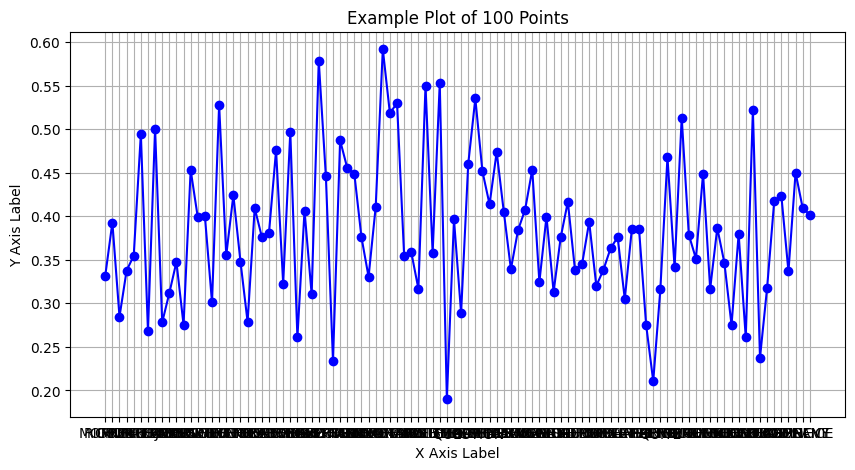

In [38]:
plot(train_average['label'], train_average['average_length'])

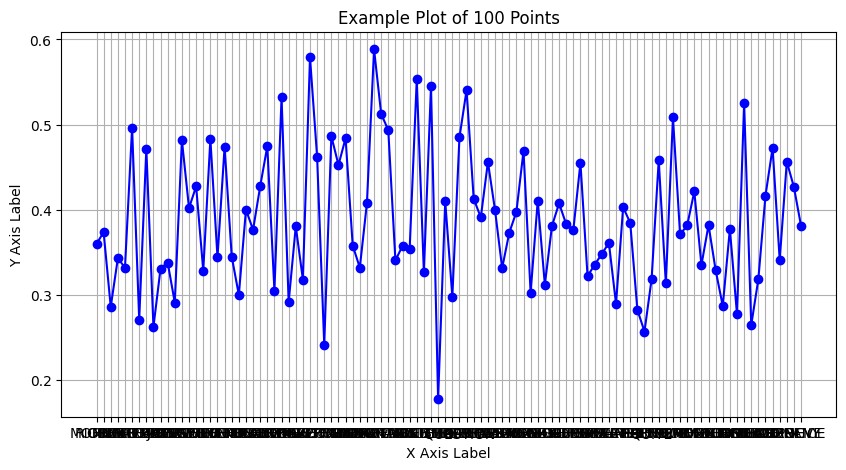

In [39]:
plot(valid_average['label'], valid_average['average_length'])

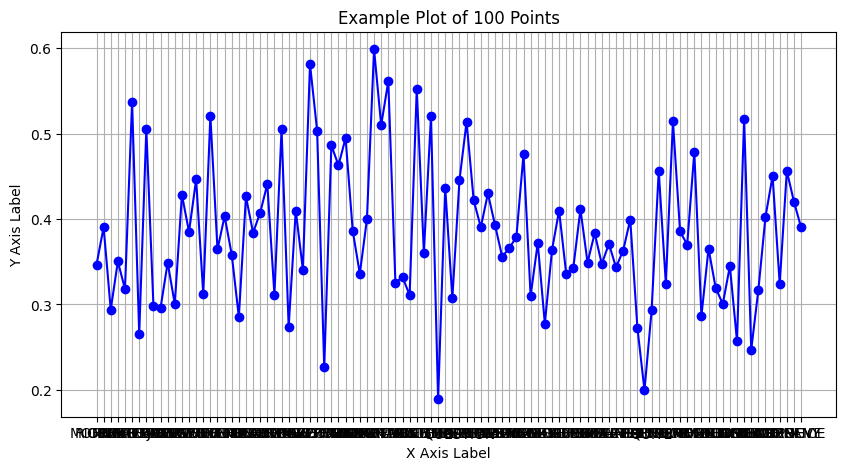

In [40]:
plot(test_average['label'], test_average['average_length'])

# Number of frames
2. how many frames each video have? Train, valid, test
1) average video frame of each word
2) overall histogram of the frame

In [49]:
def get_frame_number(file_path):
    # Open the video file
    cap = cv2.VideoCapture(file_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    frame_count = 0
    
    # Read frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:  # If no frame is returned, then we have reached the end of the video
            break
        frame_count += 1

    print(f"Total number of frames counted manually: {frame_count}")
    
    # Release the video capture object
    cap.release()
    
    return frame_count

In [50]:
get_frame_number(sample_1)

Total number of frames counted manually: 29


29

In [51]:
get_frame_number(sample_2)

Total number of frames counted manually: 29


29

In [53]:
train_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}
valid_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}
test_average = {'label': [label.split('.')[0] for label in label_names], 'average_length': [], 'max_length': [], 'min_length': []}

for label in label_names:
    print (label)
    source_directory = os.path.join('dataset/', label)
    train_directory = os.path.join(source_directory, 'train/')
    val_directory = os.path.join(source_directory, 'val/')
    test_directory = os.path.join(source_directory, 'test/')
    
    # train
    txt_files = [file for file in os.listdir(train_directory) if file.endswith('.mp4')]
    duration = []
    for file in txt_files:
        file_path = os.path.join(train_directory, file)
        duration.append(get_frame_number(file_path))
    train_average['average_length'].append(sum(duration) / len(duration))
    train_average['max_length'].append(max(duration))
    train_average['min_length'].append(min(duration))
    
    # valid
    files = [file for file in os.listdir(val_directory) if file.endswith('.mp4')]
    duration = []
    for file in files:
        file_path = os.path.join(val_directory, file)
        duration.append(get_frame_number(file_path))
    valid_average['average_length'].append(sum(duration) / len(duration))
    valid_average['max_length'].append(max(duration))
    valid_average['min_length'].append(min(duration))

    # test
    files = [file for file in os.listdir(test_directory) if file.endswith('.mp4')]
    duration = []
    for file in files:
        file_path = os.path.join(test_directory, file)
        duration.append(get_frame_number(file_path))
    test_average['average_length'].append(sum(duration) / len(duration))
    test_average['max_length'].append(max(duration))
    test_average['min_length'].append(min(duration))

RIGHT
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames counted manually: 29
Total number of frames cou

In [54]:
print(f"Training: max: {max(train_average['max_length'])}")
print(f"Training: min: {min(train_average['min_length'])}")
print(f"Validation: max: {max(valid_average['max_length'])}")
print(f"Validation: min: {min(valid_average['min_length'])}")
print(f"Test: max: {max(test_average['max_length'])}")
print(f"Test: min: {min(test_average['min_length'])}")

Training: max: 29
Training: min: 29
Validation: max: 29
Validation: min: 29
Test: max: 29
Test: min: 29


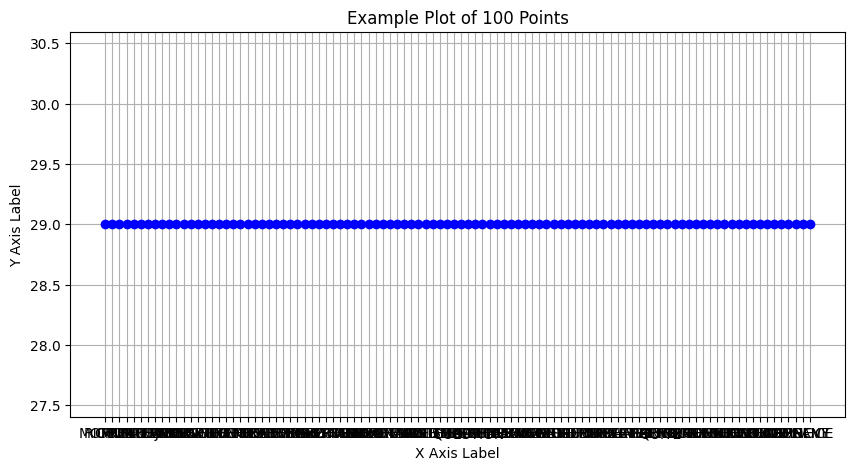

In [55]:
plot(train_average['label'], train_average['average_length'])

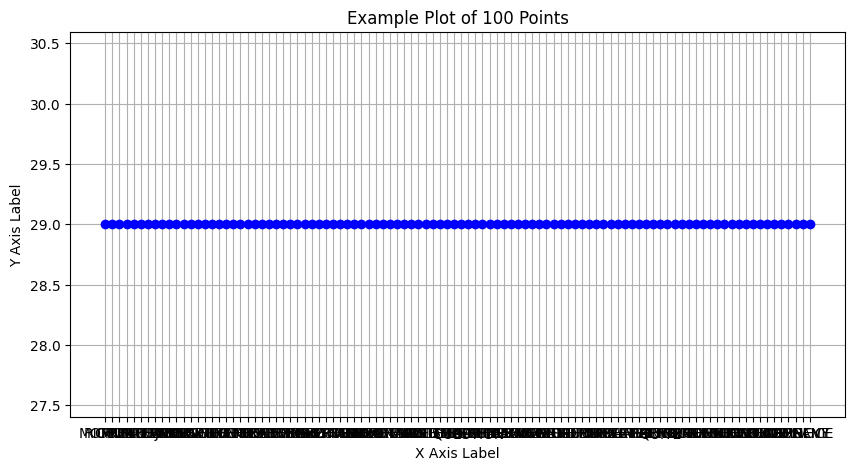

In [56]:
plot(valid_average['label'], valid_average['average_length'])

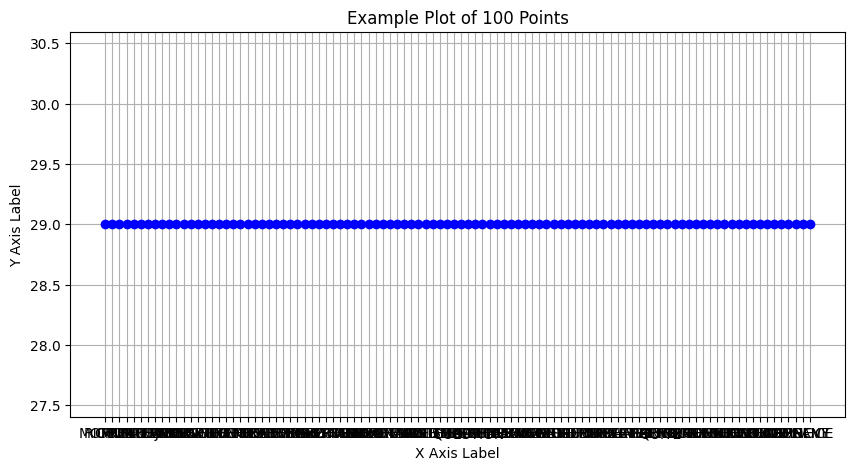

In [57]:
plot(test_average['label'], test_average['average_length'])

all of the videos are 29 frames